- https://pinkwink.kr/1009
- 해당 모든 과정과 데이터의 출처 블로그

## 1. 배경
- 목표
    - 1. 인구 소멸 위기 지역 파악
    - 2. 인구 소멸 위기 지역 지도 표현
    - 3. 지도 표현에 대한 카르토그램 표현

## 2. 데이터 읽고 인구 소멸 지역 계산하기

In [1]:
# 한글 깨짐 현상 없애주는 모듈
import set_matplotlib_hangul

Hangul OK in your windows


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore")
%matplotlib inline

In [3]:
population = pd.read_excel("../data/07_population_raw_data.xlsx",header=1)
population.fillna(method="pad",inplace=True)
population.tail()

,행정구역(동읍면)별(1),행정구역(동읍면)별(2),항목,계,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
841,제주특별자치도,제주시,남자인구수 (명),235977.0,17377.0,13118.0,15084,18350.0,8474.0,6782.0,4941,2737.0,854.0,226.0,53,17.0
842,제주특별자치도,제주시,여자인구수 (명),234688.0,15261.0,12245.0,14687,18062.0,9265.0,7877.0,7178,5649.0,3122.0,1387.0,460,137.0
843,제주특별자치도,서귀포시,총인구수 (명),170932.0,10505.0,8067.0,9120,11606.0,8686.0,7460.0,6456,4521.0,1855.0,733.0,242,77.0
844,제주특별자치도,서귀포시,남자인구수 (명),86568.0,5600.0,4247.0,4693,6082.0,4237.0,3441.0,2611,1494.0,370.0,103.0,29,9.0
845,제주특별자치도,서귀포시,여자인구수 (명),84364.0,4905.0,3820.0,4427,5524.0,4449.0,4019.0,3845,3027.0,1485.0,630.0,213,68.0


---

In [4]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   행정구역(동읍면)별(1)  846 non-null    object 
 1   행정구역(동읍면)별(2)  846 non-null    object 
 2   항목             846 non-null    object 
 3   계              846 non-null    float64
 4   20 - 24세       846 non-null    float64
 5   25 - 29세       846 non-null    float64
 6   30 - 34세       846 non-null    int64  
 7   35 - 39세       846 non-null    float64
 8   65 - 69세       846 non-null    float64
 9   70 - 74세       846 non-null    float64
 10  75 - 79세       846 non-null    int64  
 11  80 - 84세       846 non-null    float64
 12  85 - 89세       846 non-null    float64
 13  90 - 94세       846 non-null    float64
 14  95 - 99세       846 non-null    int64  
 15  100+           846 non-null    float64
dtypes: float64(10), int64(3), object(3)
memory usage: 105.9+ KB


In [5]:
population.columns = ['광역시도', '시도', '구분', '인구수', '20 - 24세', '25 - 29세',
       '30 - 34세', '35 - 39세', '65 - 69세', '70 - 74세', '75 - 79세', '80 - 84세',
       '85 - 89세', '90 - 94세', '95 - 99세', '100+']
#column 이름을 변경해줌

In [6]:
population.columns

Index(['광역시도', '시도', '구분', '인구수', '20 - 24세', '25 - 29세', '30 - 34세',
       '35 - 39세', '65 - 69세', '70 - 74세', '75 - 79세', '80 - 84세', '85 - 89세',
       '90 - 94세', '95 - 99세', '100+'],
      dtype='object')

In [7]:
population_nosogye=population[population["시도"]!="소계"]
#excel파일에는 시도 컬럼이 소계로 되어있는 값이 있는데 불필요한 값이라 제외하고 다시 저장해줌
population_nosogye.head()

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,총인구수 (명),152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자인구수 (명),75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자인구수 (명),77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,총인구수 (명),125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자인구수 (명),62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0


In [9]:
population_nosogye.loc[population_nosogye["구분"]=="총인구수 (명)", "구분"]="합계"
population_nosogye.loc[population_nosogye["구분"]=="남자인구수 (명)", "구분"]="남자"
population_nosogye.loc[population_nosogye["구분"]=="여자인구수 (명)", "구분"]="여자"
# 이름을 사용하기 쉽도록 정리해줌

In [10]:
population_nosogye.head()

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0


In [11]:
population_nosogye["20-39세"]=(population_nosogye["20 - 24세"]+population_nosogye["25 - 29세"]+population_nosogye["30 - 34세"]+population_nosogye["35 - 39세"])
population_nosogye["65세 이상"]=(population_nosogye["65 - 69세"]+population_nosogye["70 - 74세"]+population_nosogye["75 - 79세"]+population_nosogye["80 - 84세"]+population_nosogye["85 - 89세"]+population_nosogye["90 - 94세"]+population_nosogye["95 - 99세"]+population_nosogye["100+"])

population_nosogye.head()
#주제에서 이야기한 20-39세 인구와 65세 이상의 인구 컬럼을 생성

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20-39세,65세 이상
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0,44333.0,24950.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0,22222.0,10895.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0,22111.0,14055.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0,38184.0,20388.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0,19347.0,8852.0


In [12]:
pop=pd.pivot_table(
    data = population_nosogye,
    index=["광역시도","시도"],
    columns="구분",
    values=["인구수","20-39세","65세 이상"]
)
#pivot table을 사용해서 20-39세, 65세이상, 인구수 컬럼을 구분으로 구분지어서 남자,여자,합계를 나누어서 새로 데이터프레임을 생성

In [13]:
pop["소멸비율"]=pop["20-39세","여자"]/(pop["65세 이상","합계"]/2)
# 소멸비율의 계산식대로 값을 계산해서 비율 측정

In [14]:
pop

20-39세                       65세 이상                         인구수  \
구분              남자        여자        합계       남자       여자       합계        남자   
광역시도 시도                                                                       
강원도  강릉시   26286.0   23098.0   49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군    4494.0    2529.0    7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시   11511.0    9753.0   21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시    8708.0    7115.0   15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시    9956.0    8752.0   18708.0   5139.0   7613.0  12752.0   40288.0   
...            ...       ...       ...      ...      ...      ...       ...   
충청북도 진천군    9391.0    7622.0   17013.0   4731.0   6575.0  11306.0   36387.0   
     청원구   32216.0   27805.0   60021.0   8417.0  11914.0  20331.0   97006.0   
     청주시  128318.0  115719.0  244037.0  37882.0  53671.0  91553.0  419323.0   
     충주시   26600.0   22757.0   49357.0  14407.0  20383.0  34790.0  104877.0   
     흥덕구   40933.0   37675.0   78608.0   9788.0  13671.0  23459.0  127647.0   

                                  소멸비율  
구분              여자        합계            
광역시도 시도                                 
강원도  강릉시  107615.0  213846.0  1.226041  
     고성군   14215.0   30114.0  0.707314  
     동해시   46131.0   93297.0  1.289738  
     삼척시   34346.0   69599.0  0.973990  
     속초시   41505.0   81793.0  1.372647  
...            ...       ...       ...  
충청북도 진천군   33563.0   69950.0  1.348311  
     청원구   93807.0  190813.0  2.735232  
     청주시  415874.0  835197.0  2.527913  
     충주시  103473.0  208350.0  1.308249  
     흥덕구  125916.0  253563.0  3.211987  

[264 rows x 10 columns]

In [15]:
#소멸 위기지역 컬럼 생성
pop["소멸위기지역"]=pop["소멸비율"]<1.0
#True False 값으로 컬럼에 값이 들어간다

In [16]:
pop[pop["소멸위기지역"]==True].index.get_level_values(1)

Index(['고성군', '삼척시', '양양군', '영월군', '정선군', '평창군', '홍천군', '횡성군', '가평군', '양평군',
       '연천군', '거창군', '고성군', '남해군', '밀양시', '산청군', '의령군', '창녕군', '하동군', '함안군',
       '함양군', '합천군', '고령군', '군위군', '문경시', '봉화군', '상주시', '성주군', '영덕군', '영양군',
       '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '동구', '영도구',
       '강화군', '옹진군', '강진군', '고흥군', '곡성군', '구례군', '담양군', '보성군', '신안군', '영광군',
       '영암군', '완도군', '장성군', '장흥군', '진도군', '함평군', '해남군', '화순군', '고창군', '김제시',
       '남원시', '무주군', '부안군', '순창군', '임실군', '장수군', '정읍시', '진안군', '공주시', '금산군',
       '논산시', '보령시', '부여군', '서천군', '예산군', '청양군', '태안군', '홍성군', '괴산군', '단양군',
       '보은군', '영동군', '옥천군'],
      dtype='object', name='시도')

In [17]:
pop.reset_index(inplace=True)
pop.head()

광역시도   시도   20-39세                     65세 이상                         인구수  \
구분                 남자       여자       합계       남자       여자       합계        남자   
0   강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
1   강원도  고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
2   강원도  동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
3   강원도  삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
4   강원도  속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                            소멸비율 소멸위기지역  
구분        여자        합계                   
0   107615.0  213846.0  1.226041  False  
1    14215.0   30114.0  0.707314   True  
2    46131.0   93297.0  1.289738  False  
3    34346.0   69599.0  0.973990   True  
4    41505.0   81793.0  1.372647  False

In [18]:
pop.columns.get_level_values(0)[2]+pop.columns.get_level_values(1)[2]

'20-39세남자'

In [19]:
[print(type(pop.columns.get_level_values(1)[n])) for n in range(0,len(pop.columns.get_level_values(0)))]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


[None, None, None, None, None, None, None, None, None, None, None, None, None]

In [20]:
tmp_columns=[pop.columns.get_level_values(0)[n]+pop.columns.get_level_values(1)[n] for n in range(0,len(pop.columns.get_level_values(0)))]
#나는 여기서 광역시도와 시도는 멀티인덱스가 아닌데 그러면 get_level_values(1)[n]에서 오류가 나는것이 아닌가? 했지만
#빈 문자열이 들어오기 때문에 오류가 나지 않는다는 것을 알 수 있었다. type()함수를 사용해보면 빈 값들도 class str이 나오는걸 알 수 있음
pop.columns=tmp_columns
pop.head()
#get_level_values() 멀티 인덱스에서 특정 레벨을 추출할 수 있는 방법. 65세 이상 (-여자 - 남자) 이렇게 구분 될 경우 특정 레벨을 추출 한 후
#해당 코드처럼 합쳐주어 다시 컬럼을 설정해줄 수 있다.

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세 이상남자,65세 이상여자,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False


## 3. 지도 시각화를 위한 지역별 ID 만들기

In [ ]:
pop.info()

In [21]:
pop["시도"].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '권선구', '기흥구',
       '김포시', '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구', '부천시', '분당구',
       '상록구', '성남시', '소사구', '수원시', '수정구', '수지구', '시흥시', '안산시', '안성시',
       '안양시', '양주시', '양평군', '여주시', '연천군', '영통구', '오산시', '오정구', '용인시',
       '원미구', '의왕시', '의정부시', '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구',
       '파주시', '팔달구', '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시',
       '남해군', '마산합포구', '마산회원구', '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군',
       '의창구', '진주시', '진해구', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군',
       '합천군', '경산시', '경주시', '고령군', '구미시', '군위군', '김천시', '남구', '문경시',
       '봉화군', '북구', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시',
       '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구',
       '동구', '서구', '달서구', '달성군', '수성구', '중구', '대덕구', '유성구', '강서구', '금정구',
       '기

In [22]:
si_name = [None] * len(pop)
#리스트에 * 연산을 사용하면 반복해서 같은 값이 증가하기 때문에 pop의 row수만큼 None값이 증가한다
si_name[:5]

[None, None, None, None, None]

In [23]:
tmp_gu_dict = {
    "수원":["장안구","권선구","팔달구","영통구"],
    "성남":["수정구","중원구","분당구"],
    "안양":["만안구","동안구"],
    "안산":["상록구","단원구"],
    "고양":["덕양구","일산동구","일산서구"],
    "용인":["처인구","기흥구","수지구"],
    "청주":["상담구","서원구","흥덕구","청원구"],
    "천안":["동남구","서북구"],
    "전주":["완산구","덕진구"],
    "포항":["남구","북구"],
    "창원":["의창구","성산구","진해구","마산합포구","마산회원구"],
    "부천":["오정구","원미구","소사구"]
}

In [ ]:
pop.head()

In [24]:
pop["광역시도"].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [25]:
pop["시도"].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '권선구', '기흥구',
       '김포시', '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구', '부천시', '분당구',
       '상록구', '성남시', '소사구', '수원시', '수정구', '수지구', '시흥시', '안산시', '안성시',
       '안양시', '양주시', '양평군', '여주시', '연천군', '영통구', '오산시', '오정구', '용인시',
       '원미구', '의왕시', '의정부시', '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구',
       '파주시', '팔달구', '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시',
       '남해군', '마산합포구', '마산회원구', '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군',
       '의창구', '진주시', '진해구', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군',
       '합천군', '경산시', '경주시', '고령군', '구미시', '군위군', '김천시', '남구', '문경시',
       '봉화군', '북구', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시',
       '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구',
       '동구', '서구', '달서구', '달성군', '수성구', '중구', '대덕구', '유성구', '강서구', '금정구',
       '기

- 만들고자 하는 ID의 형태
    - 서울 중구
    - 서울 서초
    - 통영
    - 남양주
    - 포항 북구
    - 인천 남동
    - 안양 만안
    - 안산 단원

### (1) 일반 시 이름과 세종시, 광역시도 일반 구 정리

In [26]:
pop["광역시도"]

0       강원도
1       강원도
2       강원도
3       강원도
4       강원도
       ... 
259    충청북도
260    충청북도
261    충청북도
262    충청북도
263    충청북도
Name: 광역시도, Length: 264, dtype: object

In [27]:
for idx, row in pop.iterrows():
    if row["광역시도"][-3:] not in ["광역시","특별시","자치시"]:
        si_name[idx] = row["시도"][:-1]
     #광역시도 컬럼의 데이터가 광역시, 특별시, 자치시로 끝나지 않는다면~ 시도 컬럼 값의 마지막 글자를 삭제 => ex) 강원도 "강릉시" 일때 "강릉" 으로 자르겠다는 것   
    elif row["광역시도"] == "세종특별자치시":
        si_name[idx]="세종"
        # 세종시는 단일값이기 때문에 특수케이스로 바꾸어줌
    else:
        if len(row["시도"])==2:
            si_name[idx]=row["광역시도"][:2]+" "+row["시도"]
            #시도 값이 2글자면 그대로 사용
        else:
            si_name[idx] = row["광역시도"][:2]+" "+row["시도"][:-1]
            # 2글자가 아니라면 맨뒤에 글자(시,군,구)를 삭제



### (2) 행정구

In [28]:
#위와 같은 과정으로 행정구를 처리
for idx, row in pop.iterrows():
    if row["광역시도"][-3:] not in ["광역시","특별시","자치시"]:
        for keys, values in tmp_gu_dict.items():
            if row["시도"] in values:
                #print(row["시도"])
                if len(row["시도"])==2:
                    si_name[idx] = keys+" "+row["시도"]
                elif row["시도"] in ["마산합포구","마산회원구"]:
                    si_name[idx] = keys + " " + row["시도"][2:-1]
                    #마산 합포구와 마산 회원구는 특이하기 때문에 특별처리, 앞에 마산을 잘라내고 맨뒤에 구 라는 글자도 삭제
                else:
                    si_name[idx] = keys + " " + row["시도"][:-1]

### (3) 고성군

In [29]:
#고성은 특별시 자치시 광역시도 아닌데, 강원도와 경남 두군데가 존재하기 때문에 특수처리
for idx, row in pop.iterrows():
    if row["광역시도"][:-3] not in ["광역시","특별시","자치시"]:
        if row["시도"][:-1] == "고성" and row["광역시도"] == "강원도":
            si_name[idx]="고성(강원)"
        elif row["시도"][:-1] == "고성" and row["광역시도"] == "경상남도":
            si_name[idx]="고성(경남)"

si_name
            

['강릉',
 '고성(강원)',
 '동해',
 '삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성',
 '가평',
 '고양',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '수원 권선',
 '용인 기흥',
 '김포',
 '남양주',
 '안산 단원',
 '고양 덕양',
 '동두천',
 '안양 동안',
 '안양 만안',
 '부천',
 '성남 분당',
 '안산 상록',
 '성남',
 '부천 소사',
 '수원',
 '성남 수정',
 '용인 수지',
 '시흥',
 '안산',
 '안성',
 '안양',
 '양주',
 '양평',
 '여주',
 '연천',
 '수원 영통',
 '오산',
 '부천 오정',
 '용인',
 '부천 원미',
 '의왕',
 '의정부',
 '이천',
 '고양 일산동',
 '고양 일산서',
 '수원 장안',
 '성남 중원',
 '용인 처인',
 '파주',
 '수원 팔달',
 '평택',
 '포천',
 '하남',
 '화성',
 '거제',
 '거창',
 '고성(경남)',
 '김해',
 '남해',
 '창원 합포',
 '창원 회원',
 '밀양',
 '사천',
 '산청',
 '창원 성산',
 '양산',
 '의령',
 '창원 의창',
 '진주',
 '창원 진해',
 '창녕',
 '창원',
 '통영',
 '하동',
 '함안',
 '함양',
 '합천',
 '경산',
 '경주',
 '고령',
 '구미',
 '군위',
 '김천',
 '포항 남구',
 '문경',
 '봉화',
 '포항 북구',
 '상주',
 '성주',
 '안동',
 '영덕',
 '영양',
 '영주',
 '영천',
 '예천',
 '울릉',
 '울진',
 '의성',
 '청도',
 '청송',
 '칠곡',
 '포항',
 '광주 광산',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 서구',
 '대구 남구',
 '대구 달서',
 '대구 달성',
 '대구 동구

In [30]:
pop["ID"]=si_name
pop.head()
#생성한 si_name을 id값으로 추가해줌

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세 이상남자,65세 이상여자,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초


# 4. 지도 그리기 (카르토그램)

In [31]:
draw_korea_raw = pd.read_excel("../data/07_draw_korea_raw.xlsx")
#지도같은 모양의 엑셀파일
draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천 원미,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,부천 오정,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,인천 동구,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,성남 중원,과천,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 남구,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [32]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
#stack()함수로  엑셀의 형식을 데이터프레임으로 표시할 수 있는데, level_0은 엑셀의 열, level_1은 엑셀의 행이다. 그리고 0 컬럼은 값을 의미한다
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked

,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


In [33]:
draw_korea_raw_stacked.rename(columns={
    "level_0":"y",
    "level_1":"x",
    0:"ID"
}, inplace = True)
# 지도이기 때문에 열과 행을 각각 y와 x라는 이름으로 바꾸어줌
draw_korea_raw_stacked.head(2)

,y,x,ID
0,0,7,철원
1,0,8,화천


In [34]:
draw_korea = draw_korea_raw_stacked

In [35]:
BORDER_LINES = [
    [(5, 1), (5, 2), (7, 2), (7, 3), (11, 3), (11, 0)], # 인천
    [(5, 4), (5, 5), (2, 5), (2, 7), (4, 7), (4, 9), (7, 9), (7, 7), (9, 7), (9, 5), (10, 5), (10, 4), (5, 4)], # 서울
    [(1, 7), (1, 8), (3, 8), (3, 10), (10, 10), (10, 7), (12, 7), (12, 6), (11, 6), (11, 5), (12, 5), (12, 4), (11, 4), (11, 3)], # 경기도
    [(8, 10), (8, 11), (6, 11), (6, 12)], # 강원도
    [(12, 5), (13, 5), (13, 4), (14, 4), (14, 5), (15, 5), (15, 4), (16, 4), (16, 2)], # 충청북도
    [(16, 4), (17, 4), (17, 5), (16, 5), (16, 6), (19, 6), (19, 5), (20, 5), (20, 4), (21, 4), (21, 3), (19, 3), (19, 1)], # 전라북도
    [(13, 5), (13, 6), (16, 6)], 
    [(13, 5), (14, 5)], # 대전시 # 세종시
    [(21, 2), (21, 3), (22, 3), (22, 4), (24, 4), (24, 2), (21, 2)], # 광주
    [(20, 5), (21, 5), (21, 6), (23, 6)], # 전라남도
    [(10, 8), (12, 8), (12, 9), (14, 9), (14, 8), (16, 8), (16, 6)], # 충청북도
    [(14, 9), (14, 11), (14, 12), (13, 12), (13, 13)], # 경상북도
    [(15, 8), (17, 8), (17, 10), (16, 10), (16, 11), (14, 11)], # 대구
    [(17, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10), (21, 10)], # 부산
    [(16, 11), (16, 13)],
    [(27, 5), (27, 6), (25, 6)]
]
# 엑셀의 행렬 좌표를 사용해 각 8도의 경계선으로 만들어줌

In [36]:
draw_korea.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [37]:
draw_korea["ID"][13].splitlines()[-1]

'고양 일산동'

In [38]:
def plot_text_simple(draw_korea):
    for idx, row in draw_korea.iterrows():
        if len(row["ID"].split())==2:
            dispname = "{}\n{}".format(row["ID"].split()[0],row["ID"].split()[1])
            #ID(도시이름)이 나눠질 때, 즉 이름이 길면 시각화할때 다른 도시의 영역을 침범할 수 있기 때문에, \n를 사용해 두줄로 만들어줌
        elif row["ID"][:2]=="고성":
            dispname = "고성"
            #맨 뒤 두 글자가 고성이면 고성으로 설정
        else:
            dispname=row["ID"]
            # 그 외에는 그대로 설정
        if len(dispname.splitlines()[-1])>=3:
            fontsize,linespacing=9.5,1.5
            # ID가 길면, 이라고 해석해도 괜찮다.
            #길면 폰트사이즈와 경계선을 작게하겠다는 의미
        else:
            fontsize,linespacing=11,1.2
    
        plt.annotate(
            dispname,
            (row["x"]+0.5, row["y"]+0.5),
            fontsize=fontsize,
            linespacing=linespacing,
            weight="bold",
            ha="center",#수평정렬
            va="center",#수직정렬
            
        )

In [39]:
for path in BORDER_LINES:
        ys,xs = zip(*path)
        print(ys,xs)
        #zip함수를 사용해 앞서 BORDER_LINES라는 이름의 리스트에 만들어줬던 각 지역의 좌표값들ㄹ을 받아와
        #x는x끼리, y는 y끼리 모아서 tuple로 생성

(5, 5, 7, 7, 11, 11) (1, 2, 2, 3, 3, 0)
(5, 5, 2, 2, 4, 4, 7, 7, 9, 9, 10, 10, 5) (4, 5, 5, 7, 7, 9, 9, 7, 7, 5, 5, 4, 4)
(1, 1, 3, 3, 10, 10, 12, 12, 11, 11, 12, 12, 11, 11) (7, 8, 8, 10, 10, 7, 7, 6, 6, 5, 5, 4, 4, 3)
(8, 8, 6, 6) (10, 11, 11, 12)
(12, 13, 13, 14, 14, 15, 15, 16, 16) (5, 5, 4, 4, 5, 5, 4, 4, 2)
(16, 17, 17, 16, 16, 19, 19, 20, 20, 21, 21, 19, 19) (4, 4, 5, 5, 6, 6, 5, 5, 4, 4, 3, 3, 1)
(13, 13, 16) (5, 6, 6)
(13, 14) (5, 5)
(21, 21, 22, 22, 24, 24, 21) (2, 3, 3, 4, 4, 2, 2)
(20, 21, 21, 23) (5, 5, 6, 6)
(10, 12, 12, 14, 14, 16, 16) (8, 8, 9, 9, 8, 8, 6)
(14, 14, 14, 13, 13) (9, 11, 12, 12, 13)
(15, 17, 17, 16, 16, 14) (8, 8, 10, 10, 11, 11)
(17, 18, 18, 19, 19, 20, 20, 21) (9, 9, 8, 8, 9, 9, 10, 10)
(16, 16) (11, 13)
(27, 27, 25) (5, 6, 6)


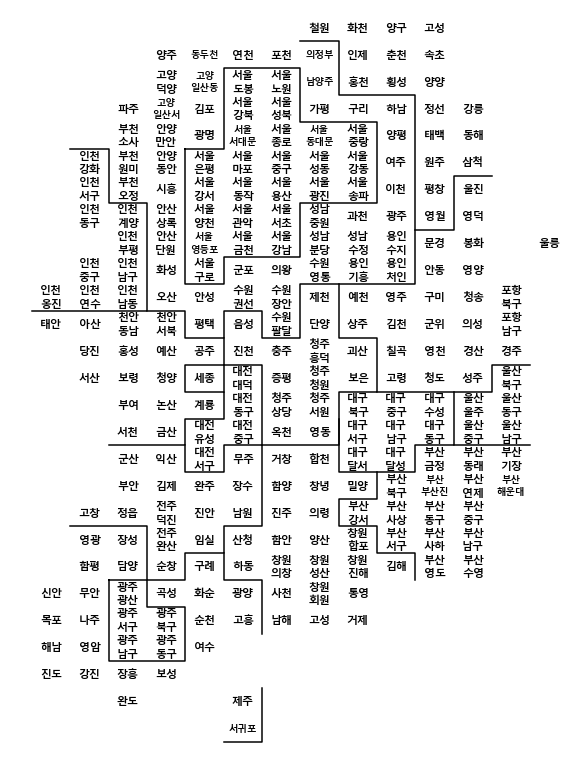

In [40]:
def simpleDraw(draw_korea):
    plt.figure(figsize=(8,11))
    
    plot_text_simple(draw_korea)
    
    for path in BORDER_LINES:
        ys,xs = zip(*path)
        #zip함수를 사용해 앞서 BORDER_LINES라는 이름의 리스트에 만들어줬던 각 지역의 좌표값들ㄹ을 받아와
        #x는x끼리, y는 y끼리 모아서 tuple로 생성
        plt.plot(xs,ys,c="black",lw=1.5)
        #xs와 ys를 까만 선으로 표현
    plt.gca().invert_yaxis()
    #상하 반전
    plt.axis("off")
    #축 표시 제거
    plt.tight_layout()
    plt.show()

simpleDraw(draw_korea)

In [41]:
draw_korea.head()
pop.head()

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세 이상남자,65세 이상여자,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초


#### 검증 작업

In [42]:
set(pop["ID"].unique())-set(draw_korea["ID"].unique())
#pop의 ID컬럼에 draw_korea의 ID컬럼에 없는 값이 있는지를 확인하는 작업
#set함수는 인자들을 집합으로 생성해주는 함수

{'고양', '부천', '상당', '성남', '수원', '안산', '안양', '용인', '전주', '창원', '천안', '청주', '포항'}

In [43]:
tmp_list = list(set(pop["ID"].unique())-set(draw_korea["ID"].unique()))
#집합을 리스트화 시켜서 저장
for tmp in tmp_list:
    pop = pop.drop(pop[pop["ID"]==tmp].index)
    #pop중에서 tmp_list에 있는(즉, pop에만 있고 draw_korea에는 없는 ID)ID의 인덱스를 찾아서 해당 행을 제거해줌
set(pop["ID"].unique())-set(draw_korea["ID"].unique())
#이제 안겹치는 ID가 없는지 다시 확인

set()

In [44]:
pop = pd.merge(pop,draw_korea,how="left",on="ID")
pop.head()
#두 데이터를 머지

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세 이상남자,65세 이상여자,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉,3,11
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원),0,10
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해,4,11
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척,5,11
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초,1,10


## 그림을 그리기 위한 데이터를 계산하는 함수
- 색상을 만들 때, 최소 값을 흰색으로 만드는 함수
- targetData : 그리고 싶은 컬럼
- blockedMap : pop 데이터 프레임(인구 현황)

In [45]:
pop.columns

Index(['광역시도', '시도', '20-39세남자', '20-39세여자', '20-39세합계', '65세 이상남자',
       '65세 이상여자', '65세 이상합계', '인구수남자', '인구수여자', '인구수합계', '소멸비율', '소멸위기지역',
       'ID', 'y', 'x'],
      dtype='object')

In [53]:
def get_data_info(targetData,blockedMap):#targetData는 컬럼명, blockedMap은 dataset
    whitelabelmin = (
        max(blockedMap[targetData])-min(blockedMap[targetData])
        )*0.25 + min(blockedMap[targetData])
    #시각화시 그려지는 색상의 최소값이 흰색이다. 그래서 whitelabelmin인듯 하다.
    vmin = min(blockedMap[targetData])#원하는 컬럼의 최소값
    vmax = max(blockedMap[targetData])# 최대값
    
    mapdata = blockedMap.pivot_table(index="y",columns="x",values=targetData)
    #기존에 받아온 데이터에서 x컬럼을 행으로, y컬럼을 열로 하고 targetData를 값으로 해서 새로운 데이터프레임을 생성
    #지도모양으로 각 지역별 targetData값이 표시되며, 지역이 아닌부분은 NaN값임
    return mapdata,vmax,vmin,whitelabelmin

In [47]:
#위의 함수의 예시로 mapdata가 어떻게 생겼는지를 확인
blockedMap=pop
targetData="인구수합계"
whitelabelmin = (
    max(blockedMap[targetData])-min(blockedMap[targetData])
    )*0.25 + min(blockedMap[targetData])
#시각화시 그려지는 색상의 최소값이 흰색이다. 그래서 whitelabelmin인듯 하다.
vmin = min(blockedMap[targetData])#원하는 컬럼의 최소값
vmax = max(blockedMap[targetData])# 최대값

mapdata = blockedMap.pivot_table(index="y",columns="x",values=targetData)
mapdata

x,0,1,2,3,4,5,6,7,8,9,10,11,12,13
y,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48013.0,26264.0,24010.0,30114.0,NaN,NaN,NaN
1,NaN,NaN,NaN,205513.0,98277.0,45907.0,154763.0,438457.0,32720.0,280707.0,81793.0,NaN,NaN,NaN
2,NaN,NaN,NaN,446233.0,292612.0,348220.0,567581.0,662154.0,70076.0,45991.0,27218.0,NaN,NaN,NaN
3,NaN,NaN,430781.000000,300839.0,363443.0,327195.0,450355.0,62448.0,193763.0,211101.0,38718.0,213846.0,NaN,NaN
4,NaN,NaN,283793.333333,252353.0,339484.0,314194.0,152737.0,355069.0,411005.0,111367.0,47070.0,93297.0,NaN,NaN
5,NaN,68010.0,283793.333333,345061.0,491476.0,379892.0,125249.0,299259.0,444168.0,111563.0,337979.0,69599.0,NaN,NaN
6,NaN,510733.0,283793.333333,402888.0,595485.0,400997.0,230241.0,357215.0,657831.0,210359.0,43318.0,51738.0,NaN,NaN
7,NaN,71014.0,330284.000000,375857.0,477739.0,506851.0,447192.0,237909.0,63778.0,327723.0,40073.0,39052.0,NaN,NaN
8,NaN,NaN,549716.000000,314002.0,370613.0,235386.0,567115.0,503830.0,232841.0,347833.0,74702.0,33539.0,NaN,10001.0


In [54]:
def get_data_info_for_zero_center(targetData,blockedMap):
    whitelabelmin = 5
    #최소값이 아닌 5를 흰색으로 지정
    tmp_max = max(
        [np.abs(min(blockedMap[targetData])), np.abs(max(blockedMap[targetData]))]
    )#targetData중 절대값이 가장 큰 값을 max값으로 지정하여 해당 절대값의 양수와 음수를 각각 최대 최소로 지정
    vmin,vmax = - tmp_max,tmp_max
    
    mapdata = blockedMap.pivot_table(index="y",columns="x",values=targetData)
    
    return mapdata,vmax,vmin,whitelabelmin

In [55]:
def plot_text(targetData,blockedMap, whitelabelmin):
    for idx, row in blockedMap.iterrows():
        if len(row["ID"].split())==2:
            dispname="{}\n{}".format(row["ID"].split()[0],row["ID"].split()[1])
        elif row["ID"][:2]=="고성":
            dispname="고성"
        else:
            dispname=row["ID"]
        
        if len(dispname.splitlines()[-1])>=3:
            fontsize,linespacing=9.5,1.5
        else:
            fontsize,linespacing=11,1.2
        
        annocolor = "white" if np.abs(row[targetData])>whitelabelmin else "black"
        #targetData의 절대값이 whitelabelmin보다 크면 흰색, 적으면 검은색으로 설정
        plt.annotate(
            dispname,
            (row["x"] + 0.5, row["y"] + 0.5),
            weight="bold",
            color=annocolor,
            fontsize=fontsize,
            linespacing=linespacing,
            ha="center",
            va="center"
        )
        

In [56]:
def drawKorea(targetData,blockedMap,cmapname,zeroCenter=False):
    if zeroCenter:
        masked_mapdata, vmax, vmin, whitelabelmin = get_data_info_for_zero_center(targetData,blockedMap)
        #zeroCenter가 true이면, get_data_info_for_zero_center로 변수들을  선언
    if (not zeroCenter):
        masked_mapdata, vmax, vmin, whitelabelmin = get_data_info(targetData,blockedMap)
        #zeroCenter가 true이면, get_data_info로 변수들을  선언
    plt.figure(figsize=(8,11))
    plt.pcolor(masked_mapdata, vmin = vmin, vmax = vmax, cmap = cmapname, edgecolor="#aaaaaa", linewidth=0.5)
    #vmin과 vmax는 컬러바의 범위이며, cmap은 색상맵의 이름, 앞서 준 masked_mapdata는 x,y좌표로 사용되어, 각 좌표별 사각형을 시각화합니다.
    #x1,y1######x2,y2
    #              #
    #              #     <-이런 방식이라고 여기면 된다
    #x3,y3######x4,y4
    plot_text(targetData,blockedMap,whitelabelmin)
    
    for path in BORDER_LINES:
        ys,xs = zip(*path)
        plt.plot(xs,ys,c="black",lw=1.5)
    
    plt.gca().invert_yaxis()
    plt.axis("off")
    plt.tight_layout()
    cb = plt.colorbar(shrink=0.1, aspect = 10)
    cb.set_label(targetData)
    plt.show()

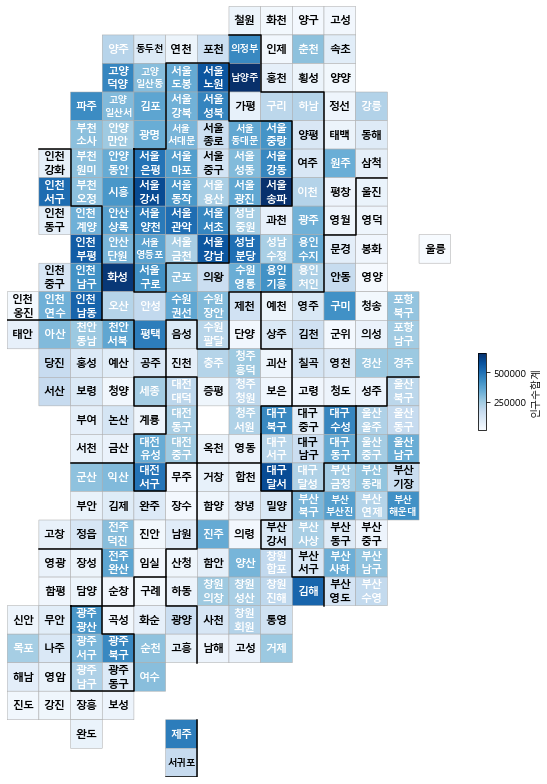

In [57]:
drawKorea("인구수합계",pop,"Blues")

---

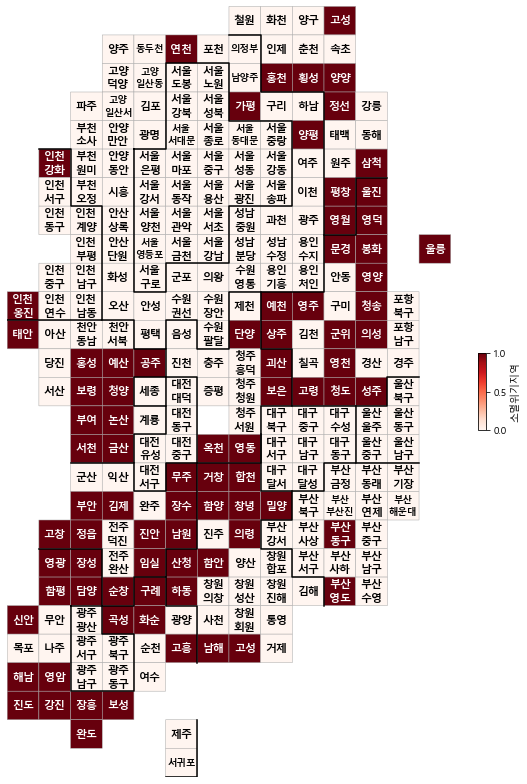

In [59]:
pop["소멸위기지역"]=[1 if con else 0 for con in pop["소멸위기지역"]]
#소멸위기지역이면 1, 아니면 0으로 값 변경
drawKorea("소멸위기지역",pop,"Reds")

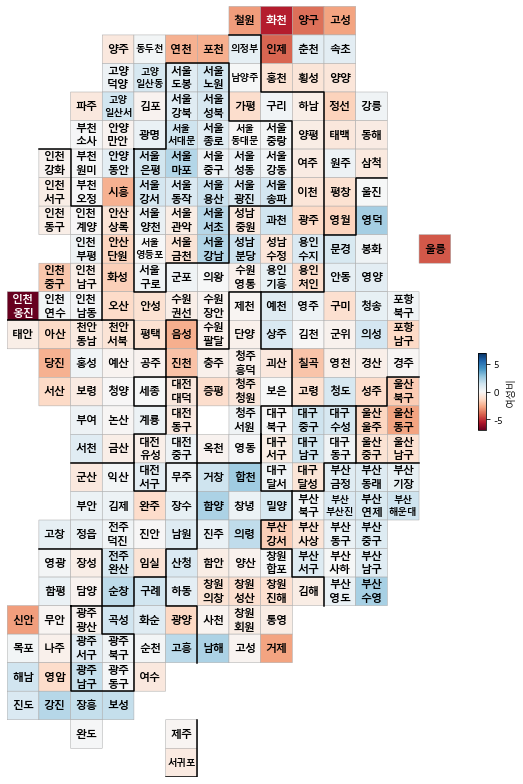

In [60]:
pop["여성비"] = (pop["인구수여자"]/pop["인구수합계"]-0.5)*100
#여성 비율을 나타냄
drawKorea("여성비",pop,"RdBu",zeroCenter=True)

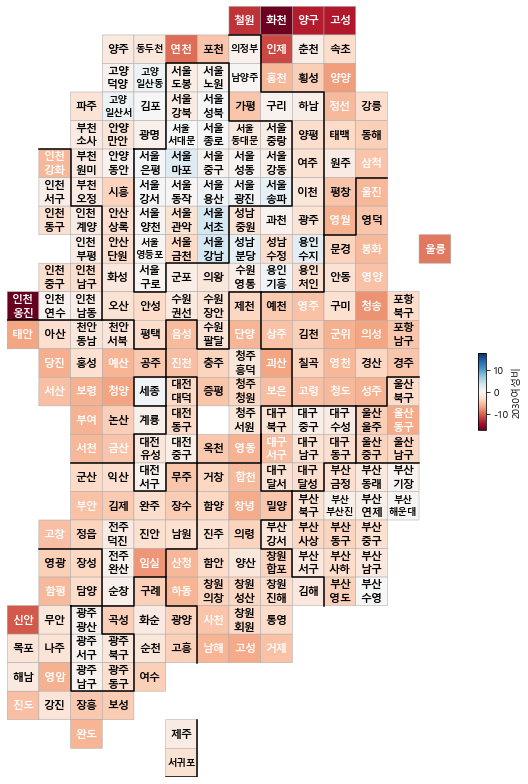

In [61]:
pop["2030여성비"] = (pop["20-39세여자"]/pop["20-39세합계"]-0.5)*100
#2030대중에서 여성의 비율을 나타냄
drawKorea("2030여성비",pop,"RdBu",zeroCenter=True)

In [62]:
import folium
import json
pop_folium = pop.set_index("ID")
pop_folium.head()

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세 이상남자,65세 이상여자,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,y,x,여성비,2030여성비
ID,,,,,,,,,,,,,,,,,
강릉,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,0,3,11,0.323597,-3.227766
고성(강원),강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,1,0,10,-2.796042,-13.989748
동해,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,0,4,11,-0.554680,-4.133747
삼척,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,1,5,11,-0.651590,-5.033812
속초,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,0,1,10,0.743951,-3.217875


In [64]:
geo_path="../data/07_skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path,encoding="utf-8"))
#각 도시별 실제 경계선 정보가 담긴 json파일 불러오기

# 인구수 합계 지도 식각화
my_map = folium.Map(
    location=[36.2002,127.054],
    zoom_start=7
)
my_map.choropleth(
    geo_data = geo_str,
    data = pop_folium["인구수합계"],
    columns=[pop_folium.index, pop_folium["인구수합계"]],
    key_on="feature.id",
    fill_color="YlGnBu"
)
my_map

In [65]:
my_map = folium.Map(
    location=[36.2002,127.054],
    zoom_start=7
)
my_map.choropleth(
    geo_data = geo_str,
    data = pop_folium["소멸위기지역"],
    columns=[pop_folium.index, pop_folium["인구수합계"]],
    key_on="feature.id",
    fill_color="PuRd"
)
my_map

In [66]:
#데이터 저장

draw_korea.to_csv("../data/07. final_1020.csv",encoding="utf-8",sep=",")